# Reading the CSV files and converting the columns in the correct format

In [1]:
import pandas as pd

In [2]:
#reading and showing off the dataset
matches = pd.read_csv("ATP_matches.csv")
#this is dataframe is going to be used later in the project
xg_matches = pd.read_csv("ATP_matches.csv")
matches.head(500000)

,surface,tourney_level,round,draw_size,tourney_date,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,...,rank_diff.1,rank_points_diff.1,age_diff.1,ace_diff,df_diff,first_serve_won_diff,second_serve_won_diff,bp_saved_diff,bp_faced_diff,target
0,Hard,A,R32,32,20000110,Tommy Haas,Jeff Tarango,R,L,21.7,...,-52.0,1017.0,-9.4,11.0,-4.0,0.0,-1.0,-1.0,-2.0,1
1,Hard,A,R32,32,20000110,Juan Balcells,Franco Squillari,R,L,24.5,...,162.0,-566.0,0.2,0.0,-7.0,14.0,-5.0,2.0,0.0,1
2,Hard,A,R32,32,20000110,Alberto Martin,Alberto Berasategui,R,R,21.3,...,-11.0,77.0,-5.2,0.0,-6.0,5.0,5.0,-6.0,-10.0,1
3,Hard,A,R32,32,20000110,Juan Carlos Ferrero,Roger Federer,R,R,19.9,...,-16.0,152.0,1.5,-6.0,-1.0,-3.0,1.0,-6.0,-8.0,1
4,Hard,A,R32,32,20000110,Michael Sell,Nicolas Escude,R,R,27.3,...,133.0,-654.0,3.6,-7.0,-6.0,5.0,-4.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149807,Clay,D,RR,4,20240203,Ilya Snitari,Joaquin Aguilar Cardozo,R,U,21.8,...,-369.0,26.0,3.0,1.0,1.0,2.0,-3.0,7.0,13.0,0
149808,Hard,D,RR,4,20240202,Philip Henning,Nam Hoang Ly,R,R,23.2,...,194.0,-35.0,-3.7,1.0,0.0,-15.0,-7.0,-7.0,-5.0,0
149809,Hard,D,RR,4,20240202,Linh Giang Trinh,Kris Van Wyk,R,R,26.4,...,NaN,NaN,-0.9,-4.0,0.0,-7.0,-3.0,-1.0,1.0,0
149810,Hard,D,RR,4,20240202,Kris Van Wyk,Nam Hoang Ly,R,R,27.3,...,-138.0,42.0,0.4,5.0,2.0,-9.0,4.0,3.0,4.0,0


In [3]:
#Deleting rows that contain NaN values
matches = matches.dropna()
matches = matches.copy()  

#Converting date in datetime64ns type
matches["tourney_date"] = pd.to_datetime(
    matches["tourney_date"].astype(str),  
    format="mixed"                       
)

xg_matches["tourney_date"] = pd.to_datetime(
    xg_matches["tourney_date"].astype(str),  
    format="mixed"                      
)

#converting every object and float type into int type
matches.loc[:, "surface_code"] = matches["surface"].astype("category").cat.codes
matches.loc[:, "tourney_level_code"] = matches["tourney_level"].astype("category").cat.codes
matches.loc[:, "round_code"] = matches["round"].astype("category").cat.codes
matches.loc[:, "player_A_name_code"] = matches["player_A_name"].astype("category").cat.codes
matches.loc[:, "player_B_name_code"] = matches["player_B_name"].astype("category").cat.codes
matches.loc[:, "player_A_hand_code"] = matches["player_A_hand"].astype("category").cat.codes
matches.loc[:, "player_B_hand_code"] = matches["player_B_hand"].astype("category").cat.codes
matches["player_A_age"] = matches["player_A_age"].round().astype(int)
matches["player_B_age"] = matches["player_B_age"].round().astype(int)
matches["age_diff"] = matches["age_diff"].round().astype(int)
matches["player_A_rank"] = matches["player_A_rank"].round().astype(int)
matches["player_B_rank"] = matches["player_B_rank"].round().astype(int)
matches["rank_diff"] = matches["rank_diff"].round().astype(int)
matches["player_A_rank_points"] = matches["player_A_rank_points"].round().astype(int)
matches["player_B_rank_points"] = matches["player_B_rank_points"].round().astype(int)
matches["rank_points_diff"] = matches["rank_points_diff"].round().astype(int)

cols_to_round = [
    "player_A_ace", "player_A_df", "w_svpt", "w_1stIn", "player_A_1stWon",
    "player_A_2ndWon", "w_SvGms", "player_A_bpSaved", "player_A_bpFaced",
    "player_B_ace", "player_B_df", "l_svpt", "l_1stIn", "player_B_1stWon",
    "player_B_2ndWon", "l_SvGms", "player_B_bpSaved", "player_B_bpFaced",
    "player_A_rank.1", "player_A_rank_points.1", "player_B_rank.1",
    "player_B_rank_points.1", "rank_diff.1", "rank_points_diff.1",
    "age_diff.1", "ace_diff", "df_diff", "first_serve_won_diff",
    "second_serve_won_diff", "bp_saved_diff", "bp_faced_diff"
]

for col in cols_to_round:
    matches[col] = matches[col].round().astype(int)
pd.set_option('display.max_columns', None)
matches

,surface,tourney_level,round,draw_size,tourney_date,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,player_A_ace,player_A_df,w_svpt,w_1stIn,player_A_1stWon,player_A_2ndWon,w_SvGms,player_A_bpSaved,player_A_bpFaced,player_B_ace,player_B_df,l_svpt,l_1stIn,player_B_1stWon,player_B_2ndWon,l_SvGms,player_B_bpSaved,player_B_bpFaced,player_A_rank.1,player_A_rank_points.1,player_B_rank.1,player_B_rank_points.1,rank_diff.1,rank_points_diff.1,age_diff.1,ace_diff,df_diff,first_serve_won_diff,second_serve_won_diff,bp_saved_diff,bp_faced_diff,target,surface_code,tourney_level_code,round_code,player_A_name_code,player_B_name_code,player_A_hand_code,player_B_hand_code
0,Hard,A,R32,32,2000-01-10,Tommy Haas,Jeff Tarango,R,L,22,31,-9,11,63,-52,1612,595,1017,18,4,96,49,39,28,17,3,5,7,8,106,55,39,29,17,4,7,11,1612,63,595,-52,1017,-9,11,-4,0,-1,-1,-2,1,3,0,6,1625,768,2,1
1,Hard,A,R32,32,2000-01-10,Juan Balcells,Franco Squillari,R,L,24,24,0,211,49,162,157,723,-566,5,3,76,52,39,13,12,5,6,5,10,74,32,25,18,12,3,6,211,157,49,723,162,-566,0,0,-7,14,-5,2,0,1,3,0,6,843,535,2,1
2,Hard,A,R32,32,2000-01-10,Alberto Martin,Alberto Berasategui,R,R,21,26,-5,48,59,-11,726,649,77,0,0,55,35,25,12,8,1,1,0,6,56,33,20,7,8,7,11,48,726,59,649,-11,77,-5,0,-6,5,5,-6,-10,1,3,0,6,36,33,2,2
3,Hard,A,R32,32,2000-01-10,Juan Carlos Ferrero,Roger Federer,R,R,20,18,2,45,61,-16,768,616,152,5,1,53,28,26,15,10,0,0,11,2,70,43,29,14,10,6,8,45,768,61,616,-16,152,2,-6,-1,-3,1,-6,-8,1,3,0,6,844,1424,2,2
4,Hard,A,R32,32,2000-01-10,Michael Sell,Nicolas Escude,R,R,27,24,4,167,34,133,219,873,-654,1,2,98,66,39,14,13,6,11,8,8,92,46,34,18,12,5,9,167,219,34,873,133,-654,4,-7,-6,5,-4,1,2,1,3,0,6,1153,1227,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149805,Clay,D,RR,4,2024-02-03,Joaquin Aguilar Cardozo,Radu Albot,U,R,19,34,-15,1109,136,973,8,489,-481,1,4,52,33,13,6,9,0,6,2,1,51,31,24,8,8,2,4,1109,8,136,489,973,-481,-15,-1,3,-11,-2,-2,2,0,1,1,8,802,1362,3,2
149806,Clay,D,RR,4,2024-02-03,Franco Roncadelli,Radu Albot,L,R,24,34,-10,616,136,480,55,489,-434,1,1,50,30,33,6,8,6,11,2,1,82,66,19,14,8,3,4,616,55,136,489,480,-434,-10,-1,0,14,-8,3,7,0,1,1,8,534,1362,1,2
149807,Clay,D,RR,4,2024-02-03,Ilya Snitari,Joaquin Aguilar Cardozo,R,U,22,19,3,740,1109,-369,34,8,26,1,1,36,22,17,7,7,8,14,0,0,61,30,15,10,6,1,1,740,34,1109,8,-369,26,3,1,1,2,-3,7,13,0,1,1,8,678,802,2,3
149808,Hard,D,RR,4,2024-02-02,Philip Henning,Nam Hoang Ly,R,R,23,27,-4,748,554,194,32,67,-35,2,1,86,60,25,6,10,1,4,1,1,56,41,40,13,9,8,9,748,32,554,67,194,-35,-4,1,0,-15,-7,-7,-5,0,3,1,8,1338,1204,2,2


# Importing random forest, training the data and showing accuracy, precision, recall, F1-score and confusion matrix

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
#n_estimators = the higher this is the more is takes to execute but potentially more accurate 
#min_samples_split = the higher this is the less accuracy but less overfitting
#random_state = if we run the random forest multiple time we are going to get the same result as long as the data remains the same
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

In [6]:
train = matches[matches["tourney_date"] < '2022-01-01']

In [7]:
test = matches[matches["tourney_date"] > '2022-01-01']

In [8]:
predictors = ["draw_size", "player_A_age", "player_B_age", "age_diff", "player_A_rank", "player_B_rank", "rank_diff", "player_A_rank_points", "player_B_rank_points", "rank_points_diff", "surface_code", "tourney_level_code", "round_code", "player_A_name_code", "player_B_name_code", "player_A_hand_code", "player_B_hand_code"]

In [9]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(n_estimators=10, random_state=1)

In [10]:
preds = rf.predict(test[predictors])

In [11]:
# accuracy
acc = accuracy_score(test["target"], preds)

In [12]:
acc

0.604876615746181

In [13]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [14]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,5809,2701
1,4024,4486


In [15]:
# precision
precision_score(test["target"], preds)

0.6241825518296925

In [16]:
# recall
recall_score(test["target"], preds)

0.527144535840188

In [17]:
# F1-score
f1_score(test["target"], preds)

0.5715741861502198

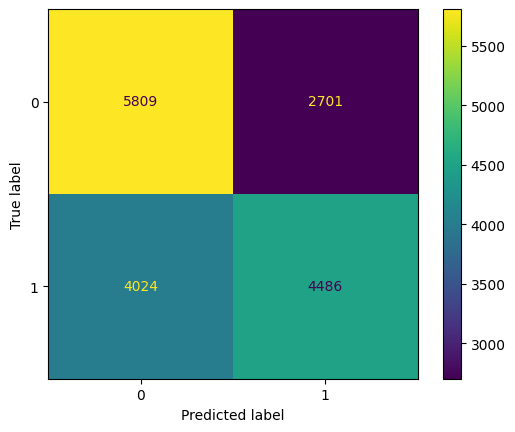

In [18]:
# Confusion Matrix
cm = confusion_matrix(test["target"], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Trying to improve the parameters by using rolling averages

In [19]:
#showing an example with player "Novak Djokovic"
grouped_matches = matches.groupby("player_A_name")
group = grouped_matches.get_group("Novak Djokovic")

In [20]:
group

,surface,tourney_level,round,draw_size,tourney_date,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,player_A_ace,player_A_df,w_svpt,w_1stIn,player_A_1stWon,player_A_2ndWon,w_SvGms,player_A_bpSaved,player_A_bpFaced,player_B_ace,player_B_df,l_svpt,l_1stIn,player_B_1stWon,player_B_2ndWon,l_SvGms,player_B_bpSaved,player_B_bpFaced,player_A_rank.1,player_A_rank_points.1,player_B_rank.1,player_B_rank_points.1,rank_diff.1,rank_points_diff.1,age_diff.1,ace_diff,df_diff,first_serve_won_diff,second_serve_won_diff,bp_saved_diff,bp_faced_diff,target,surface_code,tourney_level_code,round_code,player_A_name_code,player_B_name_code,player_A_hand_code,player_B_hand_code
15899,Clay,A,R32,32,2004-09-13,Novak Djokovic,Arnaud Clement,R,R,17,27,-9,272,67,205,128,623,-495,4,2,91,60,39,19,14,2,5,0,2,93,62,40,16,14,7,10,272,128,67,623,205,-495,-9,4,0,-1,3,-5,-5,1,1,0,6,1255,170,2,2
17132,Carpet,M,R64,48,2005-10-31,Novak Djokovic,Victor Hanescu,R,R,18,24,-6,85,37,48,488,853,-365,1,1,12,8,6,2,2,0,0,0,1,20,12,8,1,3,3,5,85,488,37,853,48,-365,-6,1,0,-2,1,-3,-5,1,0,4,7,1255,1657,2,2
17148,Carpet,M,R32,48,2005-10-31,Novak Djokovic,Mariano Puerta,R,L,18,27,-9,85,9,76,488,1834,-1346,12,2,82,51,38,19,11,4,5,4,2,74,49,34,12,10,6,8,85,488,9,1834,76,-1346,-9,8,0,4,7,-2,-3,1,0,4,6,1255,1040,2,1
17220,Carpet,A,R32,32,2005-10-24,Novak Djokovic,Ricardo Mello,R,L,18,25,-6,88,105,-17,468,398,70,4,3,80,51,37,12,11,5,7,5,5,90,65,38,14,11,6,9,88,468,105,398,-17,70,-6,-1,-2,-1,-2,-1,-2,1,0,0,6,1255,1388,2,1
18152,Clay,A,R32,32,2005-07-25,Novak Djokovic,Alex Calatrava,R,R,18,32,-14,97,163,-66,417,259,158,1,0,52,36,26,13,9,4,4,1,1,41,25,17,7,8,1,4,97,417,163,259,-66,158,-14,0,-1,9,6,3,0,1,1,0,6,1255,58,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147904,Clay,M,R32,128,2024-05-06,Novak Djokovic,Alejandro Tabilo,R,L,37,27,10,1,32,-31,9990,1320,8670,8,5,42,30,19,11,8,3,7,4,0,52,27,23,9,9,0,0,1,9990,32,1320,-31,8670,10,4,5,-4,2,3,7,0,1,4,6,1255,45,2,1
147985,Clay,A,SF,32,2024-05-20,Novak Djokovic,Tomas Machac,R,R,37,24,13,1,44,-43,9860,1029,8831,4,2,75,46,38,11,11,7,12,4,2,92,60,27,14,12,7,11,1,9860,44,1029,-43,8831,13,0,0,11,-3,0,1,0,1,0,9,1255,1618,2,2
148461,Grass,G,F,128,2024-07-01,Novak Djokovic,Carlos Alcaraz,R,R,37,21,16,2,3,-1,8360,8130,230,8,4,95,56,47,12,14,9,14,5,6,101,71,47,20,14,2,3,2,8360,3,8130,-1,230,16,3,-2,0,-8,7,11,0,2,3,2,1255,258,2,2
149034,Hard,G,R32,128,2024-08-26,Novak Djokovic,Alexei Popyrin,R,R,37,25,12,2,28,-26,7460,1635,5825,16,14,127,74,54,25,19,7,12,15,6,130,76,55,24,19,12,16,2,7460,28,1635,-26,5825,12,1,8,-1,1,-5,-4,0,3,3,6,1255,97,2,2


In [21]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("tourney_date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [22]:
cols = ['player_A_ace', 'player_A_df', 'w_svpt', 'w_1stIn', 'player_A_1stWon', 
    'player_A_2ndWon', 'w_SvGms', 'player_A_bpSaved', 'player_A_bpFaced', 
    'player_B_ace', 'player_B_df', 'l_svpt', 'l_1stIn', 'player_B_1stWon', 
    'player_B_2ndWon', 'l_SvGms', 'player_B_bpSaved', 'player_B_bpFaced', 
    'player_A_rank.1', 'player_A_rank_points.1', 'player_B_rank.1', 
    'player_B_rank_points.1', 'rank_diff.1', 'rank_points_diff.1', 
    'age_diff.1', 'ace_diff', 'df_diff', 'first_serve_won_diff', 
    'second_serve_won_diff', 'bp_saved_diff', 'bp_faced_diff']
new_cols = [f"{c}_rolling" for c in cols]

In [23]:
rolling_averages(group, cols, new_cols)

,surface,tourney_level,round,draw_size,tourney_date,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,player_A_ace,player_A_df,w_svpt,w_1stIn,player_A_1stWon,player_A_2ndWon,w_SvGms,player_A_bpSaved,player_A_bpFaced,player_B_ace,player_B_df,l_svpt,l_1stIn,player_B_1stWon,player_B_2ndWon,l_SvGms,player_B_bpSaved,player_B_bpFaced,player_A_rank.1,player_A_rank_points.1,player_B_rank.1,player_B_rank_points.1,rank_diff.1,rank_points_diff.1,age_diff.1,ace_diff,df_diff,first_serve_won_diff,second_serve_won_diff,bp_saved_diff,bp_faced_diff,target,surface_code,tourney_level_code,round_code,player_A_name_code,player_B_name_code,player_A_hand_code,player_B_hand_code,player_A_ace_rolling,player_A_df_rolling,w_svpt_rolling,w_1stIn_rolling,player_A_1stWon_rolling,player_A_2ndWon_rolling,w_SvGms_rolling,player_A_bpSaved_rolling,player_A_bpFaced_rolling,player_B_ace_rolling,player_B_df_rolling,l_svpt_rolling,l_1stIn_rolling,player_B_1stWon_rolling,player_B_2ndWon_rolling,l_SvGms_rolling,player_B_bpSaved_rolling,player_B_bpFaced_rolling,player_A_rank.1_rolling,player_A_rank_points.1_rolling,player_B_rank.1_rolling,player_B_rank_points.1_rolling,rank_diff.1_rolling,rank_points_diff.1_rolling,age_diff.1_rolling,ace_diff_rolling,df_diff_rolling,first_serve_won_diff_rolling,second_serve_won_diff_rolling,bp_saved_diff_rolling,bp_faced_diff_rolling
88075,Hard,A,R32,32,2004-09-27,Novak Djokovic,Dennis Van Scheppingen,R,R,17,29,-12,248,81,167,148,496,-348,15,12,88,57,45,22,16,10,15,7,7,118,70,39,18,16,3,7,248,148,81,496,167,-348,-12,8,5,6,4,7,8,0,3,0,6,1255,384,2,2,3.666667,3.000000,90.666667,53.333333,32.000000,13.000000,13.000000,3.000000,8.000000,0.333333,3.666667,85.333333,54.666667,32.000000,19.666667,12.666667,9.000000,13.000000,304.000000,113.000000,62.000000,655.666667,242.000000,-542.666667,-6.666667,3.333333,-0.666667,0.000000,-6.666667,-6.000000,-5.000000
93876,Hard,G,R128,128,2005-01-17,Novak Djokovic,Marat Safin,R,R,18,25,-7,188,4,184,229,3060,-2831,1,5,51,27,16,5,10,4,13,1,1,66,39,25,13,11,0,1,188,229,4,3060,184,-2831,-7,0,4,-9,-8,4,12,0,3,3,4,1255,1006,2,2,7.333333,5.000000,95.333333,59.333333,40.333333,18.333333,15.000000,5.666667,10.333333,2.666667,3.666667,103.000000,64.666667,37.666667,19.666667,15.000000,8.000000,12.000000,264.000000,134.666667,67.333333,611.000000,196.666667,-476.333333,-8.666667,4.666667,1.333333,2.666667,-1.333333,-2.333333,-1.666667
93842,Clay,A,R32,32,2005-04-04,Novak Djokovic,Antony Dupuis,R,R,18,32,-14,160,114,46,282,368,-86,2,4,68,34,29,7,11,5,10,2,1,69,41,23,18,11,5,8,160,282,114,368,46,-86,-14,0,3,6,-11,0,2,0,1,0,6,1255,163,2,2,6.333333,6.000000,82.000000,48.333333,32.666667,13.666667,13.666667,6.333333,13.000000,3.000000,3.333333,94.000000,57.000000,32.666667,18.666667,14.000000,5.666667,9.000000,236.000000,168.333333,46.333333,1423.333333,189.666667,-1255.000000,-8.000000,3.333333,2.666667,0.000000,-5.000000,0.666667,4.000000
18513,Clay,G,R128,128,2005-05-23,Novak Djokovic,Robby Ginepri,R,R,18,23,-5,153,71,82,287,550,-263,6,2,58,39,29,12,10,1,2,4,4,80,45,22,11,11,7,16,153,287,71,550,82,-263,-5,2,-2,7,1,-6,-14,1,1,3,4,1255,1404,2,2,6.000000,7.000000,69.000000,39.333333,30.000000,11.333333,12.333333,6.333333,12.666667,3.333333,3.000000,84.333333,50.000000,29.000000,16.333333,12.666667,2.666667,5.333333,198.666667,219.666667,66.333333,1308.000000,132.333333,-1088.333333,-11.000000,2.666667,4.000000,1.000000,-5.000000,3.666667,7.333333
93466,Clay,G,R64,128,2005-05-23,Novak Djokovic,Guillermo Coria,R,R,18,23,-5,153,9,144,287,2040,-1753,3,3,84,59,23,17,11,5,11,0,7,80,42,37,10,12,8,12,153,287,9,2040,144,-1753,-5,3,-4,-14,7,-3,-1,0,1,3,7,1255,614,2,2,3.000000,3.666667,59.000000,33.333333,24.666667,8.000000,10.333333,3.333333,8.333333,2.333333,2.000000,71.666667,41.666667,23.333333,14.000000,11.000000,4.000000,8.333333,167.000000,266.000000,63.000000,1326.000000,104.000000,-10

In [24]:
matches_rolling = matches.groupby("player_A_name").apply(lambda x: rolling_averages(x, cols, new_cols))

C:\Users\edinm\AppData\Local\Temp\ipykernel_24240\2766592973.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("player_A_name").apply(lambda x: rolling_averages(x, cols, new_cols))


In [25]:
matches_rolling

surface tourney_level round  draw_size tourney_date  \
player_A_name                                                                   
Abedallah Shelbayh 144885    Clay             M  R128        128   2023-04-24   
                   145316   Grass             A   R32         32   2023-06-26   
                   145552   Grass             A   R32         32   2023-07-17   
                   71542     Hard             A   R32         32   2023-11-06   
                   146440    Hard             A   R16         32   2023-11-06   
...                           ...           ...   ...        ...          ...   
Zsombor Piros      65815     Hard             D    RR          2   2021-11-28   
                   143610    Hard             D    RR          4   2022-03-04   
                   70725     Clay             A   R32         32   2023-07-24   
                   145621    Clay             A   R16         32   2023-07-24   
                   146478    Hard             A   R32         32   2023-11-06   

                                player_A_name         player_B_name  \
player_A_name                                                         
Abedallah Shelbayh 144885  Abedallah Shelbayh          Pedro Cachin   
                   145316  Abedallah Shelbayh       Roman Safiullin   
                   145552  Abedallah Shelbayh        Rinky Hijikata   
                   71542   Abedallah Shelbayh           Hugo Gaston   
                   146440  Abedallah Shelbayh        Lorenzo Sonego   
...                                       ...                   ...   
Zsombor Piros      65815        Zsombor Piros           Marin Cilic   
                   143610       Zsombor Piros    Thanasi Kokkinakis   
                   70725        Zsombor Piros  Christopher Oconnell   
                   145621       Zsombor Piros          Dino Prizmic   
                   146478       Zsombor Piros       Fabian Marozsan   

                          player_A_hand player_B_hand  player_A_age  \
player_A_name                                                         
Abedallah Shelbayh 144885             L             R            19   
                   145316             L             R            20   
                   145552             L             R            20   
                   71542              L             L            20   
                   146440             L             R            20   
...                                 ...           ...           ...   
Zsombor Piros      65815              R             R            22   
                   143610             R             R            22   
                   70725              R             R            24   
                   145621             R             R            24   
                   146478             R             R            24   

                           player_B_age  age_diff  player_A_rank  \
player_A_name                                                      
Abedallah Shelbayh 144885            28        -9            243   
                   145316            26        -6            240   
                   145552            22        -3            240   
                   71542             23        -3            215   
                   146440            28        -8            215   
...                                 ...       ...            ...   
Zsombor Piros      65815             33       -11            282   
                   143610            26        -4            240   
                   70725             29        -5            124   
                   145621            18         6            124   
                   146478            24         0            121   

                           player_B_rank  rank_diff  player_A_rank_points  \
player_A_name                                                               
Abedallah Shelbayh 144885             67        176                   233   
        

In [26]:
#Fixing indexes
matches_rolling = matches_rolling.reset_index(drop=True)

In [27]:
matches_rolling

,surface,tourney_level,round,draw_size,tourney_date,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,player_A_ace,player_A_df,w_svpt,w_1stIn,player_A_1stWon,player_A_2ndWon,w_SvGms,player_A_bpSaved,player_A_bpFaced,player_B_ace,player_B_df,l_svpt,l_1stIn,player_B_1stWon,player_B_2ndWon,l_SvGms,player_B_bpSaved,player_B_bpFaced,player_A_rank.1,player_A_rank_points.1,player_B_rank.1,player_B_rank_points.1,rank_diff.1,rank_points_diff.1,age_diff.1,ace_diff,df_diff,first_serve_won_diff,second_serve_won_diff,bp_saved_diff,bp_faced_diff,target,surface_code,tourney_level_code,round_code,player_A_name_code,player_B_name_code,player_A_hand_code,player_B_hand_code,player_A_ace_rolling,player_A_df_rolling,w_svpt_rolling,w_1stIn_rolling,player_A_1stWon_rolling,player_A_2ndWon_rolling,w_SvGms_rolling,player_A_bpSaved_rolling,player_A_bpFaced_rolling,player_B_ace_rolling,player_B_df_rolling,l_svpt_rolling,l_1stIn_rolling,player_B_1stWon_rolling,player_B_2ndWon_rolling,l_SvGms_rolling,player_B_bpSaved_rolling,player_B_bpFaced_rolling,player_A_rank.1_rolling,player_A_rank_points.1_rolling,player_B_rank.1_rolling,player_B_rank_points.1_rolling,rank_diff.1_rolling,rank_points_diff.1_rolling,age_diff.1_rolling,ace_diff_rolling,df_diff_rolling,first_serve_won_diff_rolling,second_serve_won_diff_rolling,bp_saved_diff_rolling,bp_faced_diff_rolling
0,Clay,M,R128,128,2023-04-24,Abedallah Shelbayh,Pedro Cachin,L,R,19,28,-9,243,67,176,233,767,-534,3,4,59,34,23,10,9,6,9,3,3,62,36,24,17,8,2,2,243,233,67,767,176,-534,-9,0,1,-1,-7,4,7,0,1,4,4,1,1313,1,2,4.666667,4.000000,70.666667,42.333333,30.000000,15.000000,11.333333,5.333333,9.000000,4.000000,1.000000,81.666667,44.666667,28.333333,13.666667,11.666667,2.666667,7.000000,270.000000,197.333333,80.000000,769.333333,190.000000,-572.000000,-6.000000,0.666667,3.000000,1.666667,1.333333,2.666667,2.000000
1,Grass,A,R32,32,2023-06-26,Abedallah Shelbayh,Roman Safiullin,L,R,20,26,-6,240,94,146,238,631,-393,3,4,56,33,15,9,9,3,7,4,3,49,28,25,12,8,1,2,240,238,94,631,146,-393,-6,-1,1,-10,-3,2,5,0,2,0,6,1,1435,1,2,2.666667,4.666667,61.333333,36.000000,25.333333,12.333333,9.666667,5.000000,8.666667,1.333333,1.000000,73.333333,40.000000,23.000000,13.666667,9.666667,2.000000,5.666667,259.000000,211.666667,79.666667,770.333333,179.333333,-558.666667,-7.000000,1.333333,3.666667,2.333333,-1.333333,3.000000,3.000000
2,Grass,A,R32,32,2023-07-17,Abedallah Shelbayh,Rinky Hijikata,L,R,20,22,-3,240,116,124,249,556,-307,1,4,54,30,25,14,9,4,7,3,4,65,37,25,14,10,1,1,240,249,116,556,124,-307,-3,-2,0,0,0,3,6,0,2,0,6,1,1401,1,2,2.666667,5.333333,61.666667,36.000000,22.333333,12.666667,9.666667,4.666667,8.666667,2.666667,2.000000,68.666667,36.666667,25.333333,14.666667,9.000000,1.000000,2.666667,250.000000,224.000000,64.666667,841.000000,185.333333,-617.000000,-6.333333,0.000000,3.333333,-3.000000,-2.000000,3.666667,6.000000
3,Hard,A,R32,32,2023-11-06,Abedallah Shelbayh,Hugo Gaston,L,L,20,23,-3,215,83,132,294,701,-407,6,3,83,48,30,19,10,8,11,0,0,73,44,24,14,10,9,14,215,294,83,701,132,-407,-3,6,3,6,5,-1,-3,1,3,0,6,1,659,1,1,2.333333,4.000000,56.333333,32.333333,21.000000,11.000000,9.000000,4.333333,7.666667,3.333333,3.333333,58.666667,33.666667,24.666667,14.333333,8.666667,1.333333,1.666667,241.000000,240.000000,92.333333,651.333333,148.666667,-411.333333,-6.000000,-1.000000,0.666667,-3.666667,-3.333333,3.000000,6.000000
4,Hard,A,R16,32,2023-11-06,Abedallah Shelbayh,Lorenzo Sonego,L,R,20,28,-8,215,49,166,294,955,-661,3,5,60,40,32,11,11,4,6,10,1,70,43,32,14,10,3,3,215,294,49,955,166,-661,-8,-7,4,0,-3,1,3,0,3,0,5,1,963,1,2,3.333333,3.666667,64.333333,37.000000,23.333333,14.000000,9.333333,5.000000,8.333333,2.333333,2.333333,62.333333,36.333333,24.666667,13.333333,9.333333,3.666667,5.666667,231.666667,260.333333,97.666667,629.333333,134.000000,-369.000000,-4.000000,1.000000,1.333333,-1.333333,0.666667,1.333

In [28]:
def make_predictions(data, predictiors):
    train = data[data["tourney_date"] < '2023-01-01']
    test = data[data["tourney_date"] > '2023-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    precision_roll_avg = precision_score(test["target"], preds)
    acc_roll_avg = accuracy_score(test["target"], preds)
    recall_roll_avg = recall_score(test["target"], preds)
    f1_roll_avg = f1_score(test["target"], preds)
    cm_roll_avg = confusion_matrix(test["target"], preds)
    disp_roll_avg = ConfusionMatrixDisplay(confusion_matrix=cm_roll_avg)
    return combined, precision_roll_avg, acc_roll_avg, recall_roll_avg, f1_roll_avg, disp_roll_avg

In [29]:
combined, precision_roll_avg, acc_roll_avg, recall_roll_avg, f1_roll_avg, disp_roll_avg = make_predictions(matches_rolling, predictors + new_cols)

In [30]:
#slightly decreased
acc_roll_avg

0.5990523869122117

In [31]:
#slightly improved
precision_roll_avg

0.6236424394319131

In [32]:
#slightly improved
recall_roll_avg

0.5267242899982361

In [33]:
#slightly improved
f1_roll_avg

0.5711006980969685

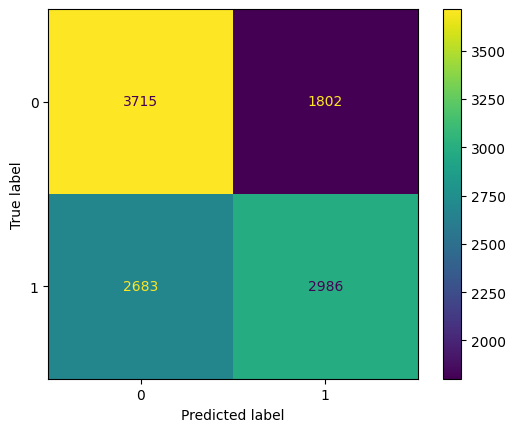

In [34]:
disp_roll_avg.plot()

In [35]:
#showing the results in a summary table
combined = combined.merge(matches_rolling[["tourney_date", "player_A_name", "player_B_name", "target"]], left_index=True, right_index=True)

In [36]:
combined

,actual,predicted,tourney_date,player_A_name,player_B_name,target
0,0,0,2023-04-24,Abedallah Shelbayh,Pedro Cachin,0
1,0,0,2023-06-26,Abedallah Shelbayh,Roman Safiullin,0
2,0,0,2023-07-17,Abedallah Shelbayh,Rinky Hijikata,0
3,1,0,2023-11-06,Abedallah Shelbayh,Hugo Gaston,1
4,0,0,2023-11-06,Abedallah Shelbayh,Lorenzo Sonego,0
...,...,...,...,...,...,...
131560,1,1,2024-11-04,Zizou Bergs,Hugo Gaston,1
131561,0,0,2024-11-04,Zizou Bergs,Cameron Norrie,0
131567,1,1,2023-07-24,Zsombor Piros,Christopher Oconnell,1
131568,0,0,2023-07-24,Zsombor Piros,Dino Prizmic,0


In [37]:
#Overall rolling averages slightly improved our model
#Now XGBoost algorithm will be tested on the initial dataset to see if it is eligible to predict future matches

# Preparing the data for training and creating train and test sets

In [46]:
#we will be using xgboost on the dataset "xg_matches" created at the beginning of the project 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 


X = xg_matches.drop(columns='target') 
y = xg_matches['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8) 

#when the error on opt() shows up, just de-comment this cell and run it once and it converts the time in the EPOC format and drops the old tourney_date column, then comment it again and run again this cell 
#xg_matches["tourney_date_epoch"] = xg_matches["tourney_date"].astype("int64") // 10**9 
#xg_matches = xg_matches.drop(columns=["tourney_date"])

# Building a pipeline of training

In [47]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()), 
    ('clf', XGBClassifier(random_state=8)) #can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

# Setting up hyperparameter tuning

In [48]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

#cv is the number of folds in cross validation, n_iter is the number of hyperparameters settings that are sampled as 10, scoring is the metric of evaluation
#Bayesian search is a method that leverages Bayesian statistics to efficiently find a target in a large, uncertain space by combining prior knowledge with new evidence to continuously update the probability of the target's location
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8) 

In [49]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

# Evaluating the model and making predictions

In [50]:
opt.best_estimator_

Pipeline(steps=[('encoder',
                 TargetEncoder(cols=['surface', 'tourney_level', 'round',
                                     'player_A_name', 'player_B_name',
                                     'player_A_hand', 'player_B_hand'])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9425384185492701,
                               colsample_bynode=0.9095956806239844,
                               colsample_bytree=0.706128679361455, device=None,
                               early_stopping_ro...
                               gamma=1.6598135411398998, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.7929828265552742, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [51]:
opt.best_score_

np.float64(0.9906206745587961)

In [52]:
opt.score(X_test, y_test)

np.float64(0.9919238332867696)

In [53]:
y_pred = opt.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], shape=(29963,))

In [54]:
opt.predict_proba(X_test)

array([[3.1876564e-04, 9.9968123e-01],
       [3.6716461e-04, 9.9963284e-01],
       [1.2600422e-04, 9.9987400e-01],
       ...,
       [6.6518784e-05, 9.9993348e-01],
       [9.9811959e-01, 1.8804165e-03],
       [9.9957013e-01, 4.2988657e-04]], shape=(29963, 2), dtype=float32)

In [55]:
#measure feature importance
opt.best_estimator_.steps

[('encoder',
  TargetEncoder(cols=['surface', 'tourney_level', 'round', 'player_A_name',
                      'player_B_name', 'player_A_hand', 'player_B_hand'])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.9425384185492701,
                colsample_bynode=0.9095956806239844,
                colsample_bytree=0.706128679361455, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=1.6598135411398998, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.7929828265552742,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_j

In [56]:
acc_xg = accuracy_score(y_test, y_pred)
acc_xg

0.9492707672796449

In [57]:
precision_xg = precision_score(y_test, y_pred, average='weighted')
precision_xg

0.9492717385874908

In [58]:
recall_xg = recall_score(y_test, y_pred, average='weighted')
recall_xg

0.9492707672796449

In [59]:
f1_xg = f1_score(y_test, y_pred, average='weighted')
f1_xg

0.9492707411742725

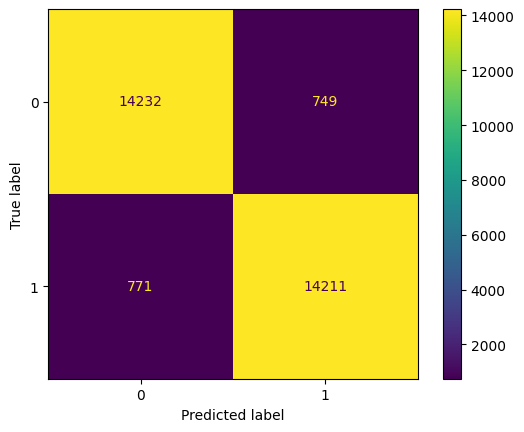

In [60]:
cm_xg = confusion_matrix(y_test, y_pred)
disp_xg = ConfusionMatrixDisplay(confusion_matrix=cm_xg)
disp_xg.plot()

In [1]:
# After comparing the 3 different clasifiers and calculating their accuracy, precision, recall, F1-score and confusion matrix,
# XGBoost clearly is the best, so we are going to be training the XGBoost model and then trying to predict future matches.
# Australian Open 2025 will be the tournament predicted based off all the matches from January 2000 up to December 2024.

# Measuring feature importance

<Figure size 1000x800 with 0 Axes>

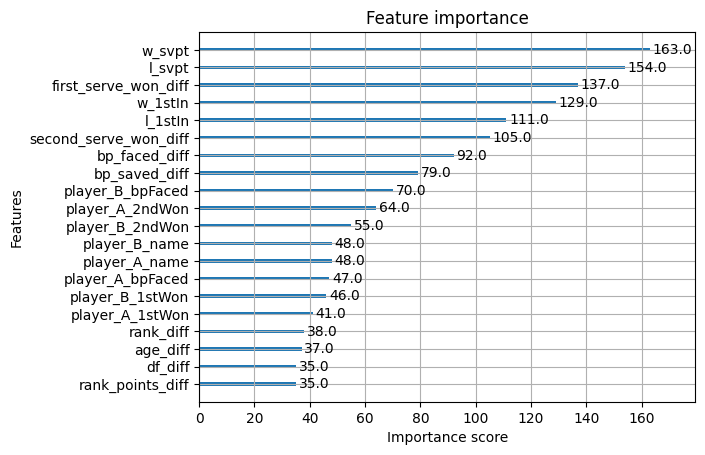

In [61]:
#showing only the top 20 most used features so the graph is readable
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]

plt.figure(figsize=(10, 8))  # it zooms the graph so it is more readable
plot_importance(xgboost_model, max_num_features=20)  # it shows the top 20 features
plt.show()

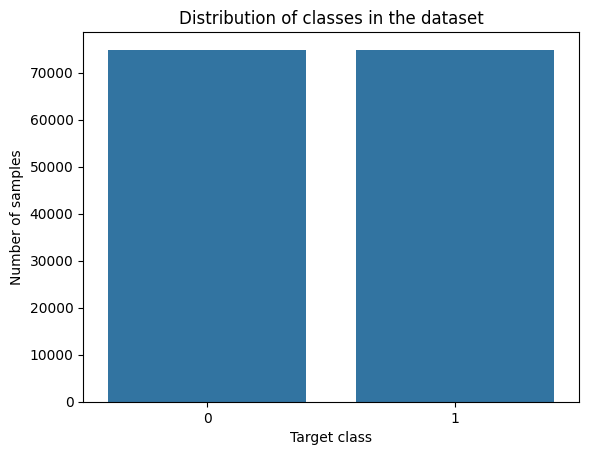

In [62]:
import seaborn as sns

# Checking whether the dataset is balanced or not to see if the metrics calculated before are reliable
sns.countplot(x=y)
plt.title("Distribution of classes in the dataset")
plt.xlabel("Target class")
plt.ylabel("Number of samples")
plt.show()

# Now, using xgboost algorithm, we are gonna try to predict the australian open 2025 using data up to december 2024

In [63]:
column_to_keep = [
    'surface', 'tourney_level', 'round', 'draw_size', 'tourney_date_epoch',
    'player_A_name', 'player_B_name', 'player_A_hand', 'player_B_hand',
    'player_A_age', 'player_B_age', 'age_diff', 'player_A_rank', 'player_B_rank',
    'rank_diff', 'player_A_rank_points', 'player_B_rank_points',
    'rank_points_diff', 'target'
]

first_round = pd.read_csv("matches_input/first_round_matches.csv")
train_data = xg_matches[column_to_keep].copy()

In [64]:
X_train_2024 = train_data.drop(columns=["target"])
y_train_2024 = train_data["target"]

In [65]:
opt.fit(X_train_2024, y_train_2024)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [66]:
results_first_rounds = first_round.copy()

#predictions
predictions = opt.predict_proba(first_round)
winner_predictions = opt.predict(first_round)

results_first_rounds['A_win_probability'] = predictions[:, 1]  # probability player A wins
results_first_rounds['B_win_probability'] = predictions[:, 0]  # probability player B wins
results_first_rounds['predicted_winner'] = winner_predictions

results_first_rounds

,surface,tourney_level,round,draw_size,tourney_date_epoch,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,A_win_probability,B_win_probability,predicted_winner
0,Hard,G,R128,128,1736640000,Jannik Sinner,Nicolas Jarry,R,R,23.4,29.3,-5.9,1,35,-34,11830,1380,10450,0.777364,0.222636,1
1,Hard,G,R128,128,1736640000,Tristan Schoolkate,Taro Daniel,R,R,23.8,31.9,-8.1,168,84,84,345,674,-329,0.486238,0.513762,0
2,Hard,G,R128,128,1736640000,Marcos Giron,Yannick Hanfmann,R,R,31.5,33.2,-1.7,46,96,-50,1150,627,523,0.545255,0.454745,1
3,Hard,G,R128,128,1736640000,Tomas Martin Etcheverry,Flavio Cobolli,R,R,24.5,22.7,1.8,39,32,7,1315,1472,-157,0.447383,0.552617,0
4,Hard,G,R128,128,1736640000,Hubert Hurkacz,Tallon Griekspoor,R,R,27.9,28.5,-0.6,16,40,-24,2640,1280,1360,0.630600,0.369400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Hard,G,R128,128,1736640000,Otto Virtanen,Arthur Fils,R,R,23.6,20.6,3.0,94,20,74,634,2355,-1721,0.301792,0.698208,0
60,Hard,G,R128,128,1736640000,Sebastian Baez,Arthur Cazaux,R,R,24.0,22.4,1.6,27,63,-36,1690,807,883,0.635843,0.364157,1
61,Hard,G,R128,128,1736640000,Jacob Fearnley,Nick Kyrgios,R,R,23.5,29.8,-6.3,99,550,-451,622,70,552,0.566131,0.433869,1
62,Hard,G,R128,128,1736640000,Pedro Martinez,Luciano Darderi,R,R,27.8,22.9,4.9,43,44,-1,1205,1198,7,0.463415,0.536585,0


In [67]:
#Saving matches results in a CSV file
col_to_keep = ['player_A_name', 'player_B_name', 'A_win_probability', 'B_win_probability', 'predicted_winner']
res = results_first_rounds[col_to_keep]
res.to_csv('matches_output/first_round_results.csv', index=False)

In [68]:
second_round = pd.read_csv("matches_input/second_round_matches.csv")

In [69]:
results_second_rounds = second_round.copy()

predictions = opt.predict_proba(second_round)
winner_predictions = opt.predict(second_round)

results_second_rounds['A_win_probability'] = predictions[:, 1]  
results_second_rounds['B_win_probability'] = predictions[:, 0]  
results_second_rounds['predicted_winner'] = winner_predictions

pd.set_option('display.max_rows', None)

results_second_rounds

,surface,tourney_level,round,draw_size,tourney_date_epoch,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,A_win_probability,B_win_probability,predicted_winner
0,Hard,G,R64,128,1736640000,Jannik Sinner,Taro Daniel,R,R,23.4,31.9,-8.5,1,84,-83,11830,674,11156,0.799785,0.200215,1
1,Hard,G,R64,128,1736640000,Marcos Giron,Flavio Cobolli,R,R,31.5,22.7,8.8,46,32,14,1150,1472,-322,0.435612,0.564388,0
2,Hard,G,R64,128,1736640000,Hubert Hurkacz,Miomir Kecmanovic,R,R,27.9,25.4,2.5,16,54,-38,2640,1021,1619,0.639934,0.360066,1
3,Hard,G,R64,128,1736640000,Matteo Berrettini,Holger Rune,R,R,28.8,21.8,7.0,34,13,21,1380,3025,-1645,0.406011,0.593989,0
4,Hard,G,R64,128,1736640000,Stefanos Tsitsipas,Martin Landaluce,R,R,26.5,19.0,7.5,11,151,-140,3165,383,2782,0.772808,0.227192,1
5,Hard,G,R64,128,1736640000,Gabriel Diallo,Karen Khachanov,R,R,23.4,28.7,-5.3,87,19,68,643,2410,-1767,0.306309,0.693691,0
6,Hard,G,R64,128,1736640000,Francisco Cerundolo,Facundo Diaz Acosta,R,L,26.5,24.1,2.4,30,79,-49,1620,714,906,0.618996,0.381004,1
7,Hard,G,R64,128,1736640000,Tristan Boyer,Alex De Minaur,R,R,23.7,25.9,-2.2,133,9,124,452,3745,-3293,0.281293,0.718707,0
8,Hard,G,R64,128,1736640000,Taylor Fritz,Borna Coric,R,R,27.3,28.2,-0.9,4,90,-86,5100,639,4461,0.705543,0.294457,1
9,Hard,G,R64,128,1736640000,Francisco Comesana,Giovanni Mpetshi Perricard,R,R,24.3,21.5,2.8,85,31,54,661,1561,-900,0.363768,0.636232,0


In [70]:
col_to_keep = ['player_A_name', 'player_B_name', 'A_win_probability', 'B_win_probability', 'predicted_winner']
res = results_second_rounds[col_to_keep]
res.to_csv('matches_output/second_round_results.csv', index=False)

In [71]:
third_round = pd.read_csv("matches_input/third_round_matches.csv")

In [72]:
results_third_rounds = third_round.copy()

predictions = opt.predict_proba(third_round)
winner_predictions = opt.predict(third_round)

results_third_rounds['A_win_probability'] = predictions[:, 1]  
results_third_rounds['B_win_probability'] = predictions[:, 0] 
results_third_rounds['predicted_winner'] = winner_predictions

pd.set_option('display.max_rows', None)

results_third_rounds

,surface,tourney_level,round,draw_size,tourney_date_epoch,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,A_win_probability,B_win_probability,predicted_winner
0,Hard,G,R32,128,1736640000,Jannik Sinner,Flavio Cobolli,R,R,23.4,22.7,0.7,1,32,-31,11830,1472,10358,0.773845,0.226155,1
1,Hard,G,R32,128,1736640000,Hubert Hurkacz,Holger Rune,R,R,27.9,21.8,6.1,16,13,3,2640,3025,-385,0.465824,0.534176,0
2,Hard,G,R32,128,1736640000,Stefanos Tsitsipas,Karen Khachanov,R,R,26.5,28.7,-2.2,11,19,-8,3165,2410,755,0.603232,0.396768,1
3,Hard,G,R32,128,1736640000,Francisco Cerundolo,Alex De Minaur,R,R,26.5,25.9,0.6,30,9,21,1620,3745,-2125,0.364911,0.635089,0
4,Hard,G,R32,128,1736640000,Taylor Fritz,Giovanni Mpetshi Perricard,R,R,27.3,21.5,5.8,4,31,-27,5100,1561,3539,0.671720,0.328280,1
5,Hard,G,R32,128,1736640000,Ben Shelton,Lorenzo Musetti,L,R,22.3,22.8,-0.5,21,17,4,2330,2600,-270,0.483393,0.516607,0
6,Hard,G,R32,128,1736640000,Andrey Rublev,Frances Tiafoe,R,R,27.3,27.0,0.3,8,18,-10,3760,2585,1175,0.615548,0.384452,1
7,Hard,G,R32,128,1736640000,Alexei Popyrin,Daniil Medvedev,R,R,26.4,28.9,-2.5,24,5,19,1865,5030,-3165,0.256539,0.743461,0
8,Hard,G,R32,128,1736640000,Novak Djokovic,Tomas Machac,R,R,37.7,24.3,13.4,7,25,-18,3910,1758,2152,0.693734,0.306266,1
9,Hard,G,R32,128,1736640000,Jiri Lehecka,Grigor Dimitrov,R,R,23.2,33.7,-10.5,28,10,18,1660,3350,-1690,0.390007,0.609993,0


In [73]:
col_to_keep = ['player_A_name', 'player_B_name', 'A_win_probability', 'B_win_probability', 'predicted_winner']
res = results_third_rounds[col_to_keep]
res.to_csv('matches_output/third_round_results.csv', index=False)

In [74]:
fourth_round = pd.read_csv("matches_input/fourth_round_matches.csv")

In [75]:
results_fourth_rounds = fourth_round.copy()

predictions = opt.predict_proba(fourth_round)
winner_predictions = opt.predict(fourth_round)

results_fourth_rounds['A_win_probability'] = predictions[:, 1]  
results_fourth_rounds['B_win_probability'] = predictions[:, 0]  
results_fourth_rounds['predicted_winner'] = winner_predictions

pd.set_option('display.max_rows', None)

results_fourth_rounds

,surface,tourney_level,round,draw_size,tourney_date_epoch,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,A_win_probability,B_win_probability,predicted_winner
0,Hard,G,R16,128,1736640000,Jannik Sinner,Holger Rune,R,R,23.4,21.8,1.6,1,13,-12,11830,3025,8805,0.733991,0.266009,1
1,Hard,G,R16,128,1736640000,Stefanos Tsitsipas,Alex De Minaur,R,R,26.5,25.9,0.6,11,9,2,3165,3745,-580,0.490054,0.509946,0
2,Hard,G,R16,128,1736640000,Taylor Fritz,Lorenzo Musetti,R,R,27.3,22.8,4.5,4,17,-13,5100,2600,2500,0.643291,0.356709,1
3,Hard,G,R16,128,1736640000,Andrey Rublev,Daniil Medvedev,R,R,27.3,28.9,-1.6,8,5,3,3760,5030,-1270,0.391830,0.608170,0
4,Hard,G,R16,128,1736640000,Novak Djokovic,Grigor Dimitrov,R,R,37.7,33.7,4.0,7,10,-3,3910,3350,560,0.596196,0.403804,1
5,Hard,G,R16,128,1736640000,Jack Draper,Carlos Alcaraz,L,R,23.1,21.8,1.3,15,3,12,2685,7010,-4325,0.290840,0.709160,0
6,Hard,G,R16,128,1736640000,Casper Ruud,Tommy Paul,R,R,26.1,27.7,-1.6,6,12,-6,4255,3145,1110,0.597838,0.402162,1
7,Hard,G,R16,128,1736640000,Ugo Humbert,Alexander Zverev,L,R,26.6,27.8,-1.2,14,2,12,2765,7915,-5150,0.300670,0.699330,0


In [76]:
col_to_keep = ['player_A_name', 'player_B_name', 'A_win_probability', 'B_win_probability', 'predicted_winner']
res = results_fourth_rounds[col_to_keep]
res.to_csv('matches_output/fourth_round_results.csv', index=False)

In [77]:
QF_round = pd.read_csv("matches_input/QF_matches.csv")

In [78]:
results_QF_rounds = QF_round.copy()

predictions = opt.predict_proba(QF_round)
winner_predictions = opt.predict(QF_round)

results_QF_rounds['A_win_probability'] = predictions[:, 1]  
results_QF_rounds['B_win_probability'] = predictions[:, 0]  
results_QF_rounds['predicted_winner'] = winner_predictions

pd.set_option('display.max_rows', None)

results_QF_rounds

,surface,tourney_level,round,draw_size,tourney_date_epoch,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,A_win_probability,B_win_probability,predicted_winner
0,Hard,G,QF,128,1736640000,Jannik Sinner,Alex De Minaur,R,R,23.4,25.9,-2.5,1,9,-8,11830,3745,8085,0.732106,0.267894,1
1,Hard,G,QF,128,1736640000,Taylor Fritz,Daniil Medvedev,R,R,27.3,28.9,-1.6,4,5,-1,5100,5030,70,0.460013,0.539987,0
2,Hard,G,QF,128,1736640000,Novak Djokovic,Carlos Alcaraz,R,R,37.7,21.8,15.9,7,3,4,3910,7010,-3100,0.364905,0.635095,0
3,Hard,G,QF,128,1736640000,Casper Ruud,Alexander Zverev,R,R,26.1,27.8,-1.7,6,2,4,4255,7915,-3660,0.349601,0.650399,0


In [79]:
col_to_keep = ['player_A_name', 'player_B_name', 'A_win_probability', 'B_win_probability', 'predicted_winner']
res = results_QF_rounds[col_to_keep]
res.to_csv('matches_output/QF_results.csv', index=False)

In [80]:
SF_round = pd.read_csv("matches_input/SF_matches.csv")

In [81]:
results_SF_rounds = SF_round.copy()

predictions = opt.predict_proba(SF_round)
winner_predictions = opt.predict(SF_round)

results_SF_rounds['A_win_probability'] = predictions[:, 1]  
results_SF_rounds['B_win_probability'] = predictions[:, 0] 
results_SF_rounds['predicted_winner'] = winner_predictions

pd.set_option('display.max_rows', None)

results_SF_rounds

,surface,tourney_level,round,draw_size,tourney_date_epoch,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,A_win_probability,B_win_probability,predicted_winner
0,Hard,G,SF,128,1736640000,Jannik Sinner,Daniil Medvedev,R,R,23.4,28.9,-5.5,1,5,-4,11830,5030,6800,0.672380,0.327620,1
1,Hard,G,SF,128,1736640000,Alexander Zverev,Carlos Alcaraz,R,R,27.8,21.8,6.0,2,3,-1,7915,7010,905,0.493493,0.506508,0


In [82]:
col_to_keep = ['player_A_name', 'player_B_name', 'A_win_probability', 'B_win_probability', 'predicted_winner']
res = results_SF_rounds[col_to_keep]
res.to_csv('matches_output/SF_results.csv', index=False)

In [83]:
F_round = pd.read_csv("matches_input/F_matches.csv")

In [84]:
results_F_rounds = F_round.copy()

predictions = opt.predict_proba(F_round)
winner_predictions = opt.predict(F_round)

results_F_rounds['A_win_probability'] = predictions[:, 1]  
results_F_rounds['B_win_probability'] = predictions[:, 0] 
results_F_rounds['predicted_winner'] = winner_predictions

pd.set_option('display.max_rows', None)

results_F_rounds

,surface,tourney_level,round,draw_size,tourney_date_epoch,player_A_name,player_B_name,player_A_hand,player_B_hand,player_A_age,player_B_age,age_diff,player_A_rank,player_B_rank,rank_diff,player_A_rank_points,player_B_rank_points,rank_points_diff,A_win_probability,B_win_probability,predicted_winner
0,Hard,G,F,128,1736640000,Jannik Sinner,Carlos Alcaraz,R,R,23.4,21.8,1.6,1,3,-2,11830,7010,4820,0.529657,0.470343,1


In [85]:
col_to_keep = ['player_A_name', 'player_B_name', 'A_win_probability', 'B_win_probability', 'predicted_winner']
res = results_F_rounds[col_to_keep]
res.to_csv('matches_output/F_results.csv', index=False)